# Report

## Project: Navigation

### Abstract: 
Using deep reinforcement learning techniques we trained the agent to navigate in a large, square world and collect as many yellow bananas as possible while avoiding blue bananas.

### Keywords:
Temporal-difference (TD) control methods, Q-learning algorithm, Deep Q-network (DQN), Double deep Q-network (DDQN), experience replay, Dueling Network Architecture 

### Introduction:
We consider task in which the agent interacts with an environment through a sequence of observations, actions and rewards. The goal of the agent is to select actions in a fashion that maximizes cumulative future reward. To obtain an optimal policy that achieves a lot of reward over the long run we need to find the optimal action-value function Q* by solving the Bellman equation $\eqref{eq:belman}$. 

\begin{equation}
Q^* (s, a) = \mathbf{E}  \left[R_{t+1} + \gamma \underset{a^{'}}{\textrm{max}} Q^* (S_{t+1}, a^{'}) \mid S_{t} = s, A_{t} = a \right] 
\label{eq:belman} \tag 1
\end{equation}

To compute, approximate and learn the optimal action-value function we use an off-policy temporal-difference (TD) control method such as Q-learning algorithm (or Sarsamax) and deep neural network. Combining the Q-learning update rule $\eqref{eq:update_rule}$ with an action-value nonlinear function approximator we get deep Q-learning algorithm (DQN) ([more details in research paper](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf)).

\begin{equation}
Q (S_{t}, A_{t}) \leftarrow Q (S_{t}, A_{t}) + \alpha \big(R_{t+1} + \gamma \underset{a}{\textrm{max}} Q(S_{t+1}, a) \big)
\label{eq:update_rule} \tag 2
\end{equation}

Stability and efficiency of deep Q-learning algorithm is provided by using two important techniques such as use of experience replay and use fixed and separate target network. The memory buffer is used to recycle older experiences of the agent in the environment and improve learning task. It also helps us to avoid the strong correlations between experience tuples which neural network can take in sequential order. The simultaneous updating on neural network parameters for the target and expected values may also contribute to instability and the occurrence of undesirable oscillations. The solution to this problem is to define a separate neural network with its own parameters for calculating the target value. Instead of training both of primary and target networks, only a primary network is actually trained via backpropogation. The target network parameters is periodically copied from the primary network parameters. Generating the target value using old an older set old parameters adds a delay between the time an update to estimate value is made and the time the update affects the target value, making oscillations much more unlikely.

The problem of deep Q-learning algorithm (DQN) is overestimate action values which can have negative effect on policy quality. Expecting to receive the maximum reward all the time to be positive bias and distort the reality picture of expected reward values for move in the chosen direction. This is due to the presence the max operator in target compute equation which uses the same values for both to select and to evaluate an action. To reduce overestimation action selection is decoupled from the evaluation. We select the best action for the next state using the primary network and evaluate it using the target network. Thus, we improve deep Q-learning algorithm (DQN) to double Q-learning algorithm (DDQN) ([more details in research paper](https://arxiv.org/abs/1509.06461)).

To improve performance of double Q-learning algorithm (DDQN) we use Dueling Network Architecture. We get Q-values from state values and (state-depend) action advantages simultaneously calculated by neural network according to the equation $\eqref{eq:dual}$.

\begin{equation}
Q(s, a) = V (s) + A(s, a) - \frac{1}{\|a\|} \sum_{a^{'}}^{} A(s, a^{'}) 
\label {eq:dual} \tag 3
\end{equation}

This is provided by the presence of two streams in the neural network, whose outputs are combined into one special aggregating layer to obtain the state-action values ([more details in research paper](https://arxiv.org/abs/1511.06581)).  The key idea of decomposing action-value function Q is that being in some states may be more or less valuable for the agent than other. So there's no need to waste training resources trying to find the best actions to take if being in state is unprofitable, and vice versa. 

### Project Objective:
The goal of the project is to create an agent training solution that will allow an agent to achieve an average score of +13 over 100 consecutive episodes in fewer than 1800 episodes.

### Algorithm Selection:
The learning of the agent is based on double Q-learning algorithm (DDQN) with Dueling Network Architecture. 

Learning algorithm is presented below:

*** 
__Double DQN Algorithm__

***

Initialize replay memory _D_ with capacity _N_
<br>
Initialize action-value function $\hat{Q}$ with random weights *&theta;*
<br>
Initialize target action-value weights *&theta; &larr; &theta;$^{-}$*
<br>
__for__ the episode *e* &larr; 1 __to__ *M*:
<br>
&emsp;&emsp; Initial input frame $x_{t}$ 
<br>
&emsp;&emsp; Prepare initial state: *S &larr; &straightphi;($\langle x_{t} \rangle$)*
<br>
&emsp;__for__ time step *t* &larr; __to__ *T*:
<br>
&emsp;&emsp;&emsp;&emsp; Choose action *A* from state *S* using policy *&pi; &larr; &straightepsilon;-Greedy $\big(\hat{Q}$ (S, A, &theta;)$\big)$*
<br>
&emsp;&emsp;&emsp;&emsp; Take action *A*, observe reward *R*, and next input frame $x_{t+1}$
<br>
&emsp;&emsp;&emsp;&emsp; Prepare next state: *S $^{'}$ &larr; &straightphi;($\langle x_{t-2}, x_{t-1}, x_{t}, x_{t+1}  \rangle$)*
<br>
&emsp;&emsp;&emsp;&emsp; Store experience tuple *(S, A, R, S $^{'}$)* in replay memory *D* 
<br>
&emsp;&emsp;&emsp;&emsp; *S &larr; S $^{'}$*
<br>
&emsp;&emsp;&emsp;&emsp; Obtain random minibatch of tuples *($s_{j}$, $a_{j}$, $r_{j}$, $s_{j+1}$)* from *D*
<br>
&emsp;&emsp;&emsp;&emsp; Define *$a^{max}$($s_{j+1}$, &theta;) = arg $max_{a_{j+1}}$$\hat{Q}$ ($s_{j+1}$, $a_{j+1}$, &theta;$_{j}$)* 
<br>
&emsp;&emsp;&emsp;&emsp; Set target *$y_{j}$ = $r_{j}$ + &gamma; $\hat{Q}$ $\big(s_{j+1}$, $a^{max}$($s_{j+1}$, &theta;$_{j}$), &theta;$^{-}$$\big)$* 
<br>
&emsp;&emsp;&emsp;&emsp; Update: *&Delta;&theta; = &alpha; $\big( y_{j}$ - $\hat{Q}$( $s_{j}$, $a_{j}$, &theta;)$\big)$ &nabla;$\hat{Q}$( $s_{j}$, $a_{j}$, &theta;)* 
<br>
&emsp;&emsp;&emsp;&emsp; Every *C* steps, reset *&theta; &larr; &theta;$^{-}$* 

### Implementation description:

In `model.py` __Dueling_QNetwork__ class is used to built a feedforward neural network using the PyTorch *torch.nn module*. The network has dueling architecture, i.e consist of two streams that represent the value and advantages function. The network takes the state as input, and returns the corresponding action values for each possible action.

The network consist of three layers:
- __common_layer__
- __value_func_layer__
- __adv_func_layer__

The common layer (__common_layer__) is the sequential container. In it's structure it has __three fully connected layers__ (256, 128 & 64 cells respectively). The number of cells in the first fully connected layer of __common_layer__ is determined by the *state_size* parameter. To get improvement in the training speed and avoid the overfitting of our network it also has normalization layers (__BatchNorm1d__) and dropout layers (__Dropout__) between them. The output of a __common layer__ is used by other remaining layers (__value_func_layer__, __adv_func_layer__) to compute a single value of a given state and advantages for each action for a given state. The output of __adv_func_layer__ is determined by the *action_size* parameter.  Using this estimated values the neural network compute action values for all possible actions in a given state with a forward pass through the network.

`double_dqn_agent.py` includes the DQN __Agent__ class implemented by the algorithm described above and the experience replay memory buffer class __ReplayBuffer__

- The DQN (deep Q-network) __Agent__ class has following methods:
    - `__init__()`:
        - Initialize Pimary Q-network
        - Initialize Target Q-network
        - Initialize Replay memory buffer of 100000 size  
    - `step`
        - Store the agent's experience (__state, action, reward, next_state, done__) in Replay memory buffer
        - Every 4 steps update the parameters of Primary Q-network and soft-update parameters of Target Q-network using samples uniformly at random from Replay memory buffer (if samples in Replay memory buffer is enough)
    - `act`
        - Select and execute actions according to e-greedy policy based on Q-values
    - `learn`
        - Update the neural network learnable parameters (or weights) using given batch of experience from Replay memory buffer, then apply soft-update method to Target Q-network.
    - `soft_update`
        - "Soft copy" weight values from Primary Q-network to Target Q-network


- The __ReplayBuffer__ class has following methods:
    - `add`:
        - Add a new agent's experience to memory
    - `sample`:
        - Randomly sample a batch of experiences from memory
        
`Navigation.ipynb` provides code to train and test DQN agent.
 
 __Choosen `hyperparameters`:__
 
- Replay memory buffer size (__BUFFER_SIZE__) = 100000
- Minibatch of samples size (__BATCH_SIZE__) = 64   
- Discount factor (__GAMMA__) = 0.99  
- Fixed value for soft update of target parameters (__TAU__) = 0.001    
- Learning rate (__LR__) = 0.0005
- Frequency of update the network (__UPDATE_EVERY__) = 4  

### Conclusions:

__We reached the goal of the project in 416 episodes.__

<blockquote>
Episode 100 &emsp; Average Score: 0.03
<br>
Episode 200	&emsp; Average Score: 2.02
<br>
Episode 300	&emsp; Average Score: 6.05
<br>
Episode 400	&emsp; Average Score: 9.52
<br>
Episode 500	&emsp; Average Score: 12.41
<br>
Episode 516	&emsp; Average Score: 13.08

Environment solved in 416 episodes!	&emsp; Average Score: 13.08
</blockquote>

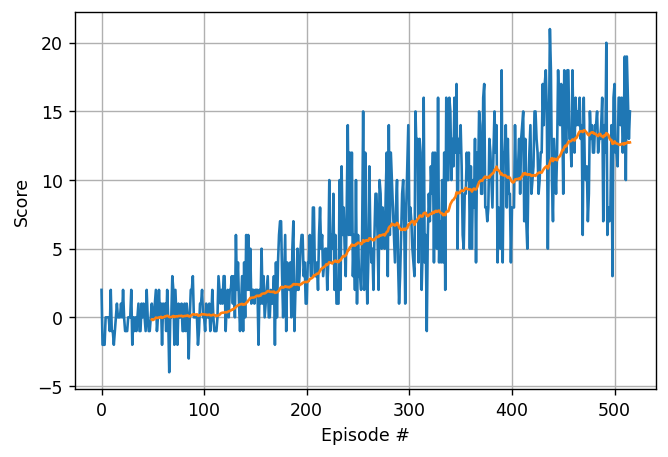

### Ideas for Future Work:

- Use __Prioritized experience replay__. We also store experiences in memory replay buffer, but we don't replay it all uniformly at random. We prioritize experiences and continue to use them according to their priority. The key idea is that some experiences may be more or less useful than other at different moments in time.
<br>
- Use __Convolutional Neural Network__ that uses convolutional layers to filter of agent's field of view screenshots for useful information. 